In [276]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Load the dataset

file_path = r'C:\Users\dixad\Documents\covid_data-analysis\Data\anime.csv'
anime_data = pd.read_csv(file_path)




In [277]:
# Inspect basic information
print("Dataset Info:")
anime_data.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object

In [278]:
print("\nPreview of the Dataset:")
anime_data.head()


Preview of the Dataset:


,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,8.55,1,108,3,"Centuries ago, mankind was slaughtered to near...","AoT, SnK",進撃の巨人,Attack on Titan,TV,25,...,Spring 2013,Sundays at 01:58 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, Award WinningAward Winning, Dram...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
1,8.62,2,80,3,"Brutal murders, petty thefts, and senseless vi...",DN,デスノート,Death Note,TV,37,...,Fall 2006,Wednesdays at 00:56 (JST),"VAP, Nippon Television Network, Shueisha, D.N....",VIZ Media,Madhouse,Manga,"SupernaturalSupernatural, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)
2,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
3,8.50,4,133,3,The seemingly unimpressive Saitama has a rathe...,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,TV,12,...,Fall 2015,Mondays at 01:05 (JST),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"ActionAction, ComedyComedy",SeinenSeinen,24 min. per ep.,R - 17+ (violence & profanity)
4,8.47,6,145,3,"Ever since the death of his father, the burden...",Blade of Demon Destruction,鬼滅の刃,Demon Slayer: Kimetsu no Yaiba,TV,26,...,Spring 2019,Saturdays at 23:30 (JST),"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,"ActionAction, Award WinningAward Winning, Fant...",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [279]:
# Create a new DataFrame for studios-related analysis
studio_data = anime_data[['Studios', 'Rank']].copy()

# Perform operations on 'studio_data' instead of 'anime_data'
studio_data.head()

,Studios,Rank
0,Wit Studio,108
1,Madhouse,80
2,Bones,2
3,Madhouse,133
4,ufotable,145


In [280]:
print(anime_data.columns)

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')


In [281]:

# Checking missing values in the 'English' column
total_count = anime_data.shape[0]
english_missing_count = anime_data['English'].isna().sum()

# Calculate percentages
with_english_title = total_count - english_missing_count
without_english_title = english_missing_count
percentage_with = (with_english_title / total_count) * 100
percentage_without = (without_english_title / total_count) * 100

print(f"Total anime: {total_count}")
print(f"Anime with English titles: {with_english_title} ({percentage_with:.2f}%)")
print(f"Anime without English titles: {without_english_title} ({percentage_without:.2f}%)")


Total anime: 1000
Anime with English titles: 859 (85.90%)
Anime without English titles: 141 (14.10%)


In [282]:
# Clean and split 'Studios'
anime_data['Studios'] = anime_data['Studios'].str.split(', ')

# Explode 'Studios' for analysis
exploded_studios = anime_data.explode('Studios')

# Group by 'Has_English_Title' and 'Studios'
exploded_studios['Has_English_Title'] = anime_data['English'].notna()
studio_analysis = (
    exploded_studios.groupby(['Studios', 'Has_English_Title'])
    .size()
    .unstack(fill_value=0)
)

# Calculate the percentage of anime with English titles for each studio
studio_analysis['Percentage_With_English'] = (
    studio_analysis[True] / studio_analysis.sum(axis=1) * 100
)
studio_analysis = studio_analysis.sort_values(by='Percentage_With_English', ascending=False)

print("Top Studios by Percentage of Anime with English Titles:")
print(studio_analysis.head(10))


Top Studios by Percentage of Anime with English Titles:
Has_English_Title        False  True  Percentage_With_English
Studios                                                      
8bit                         0     9                    100.0
Satelight                    0     7                    100.0
Red Dog Culture House        0     1                    100.0
Radix                        0     1                    100.0
Purple Cow Studio Japan      0     1                    100.0
Project No.9                 0     1                    100.0
Platinum Vision              0     2                    100.0
Pierrot Plus                 0     1                    100.0
Phoenix Entertainment        0     1                    100.0
Pastel                       0     1                    100.0


In [283]:
print(anime_data.columns)


Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')


In [284]:
# Rename the 'English' column to 'Title'
anime_data.rename(columns={'English': 'Title'}, inplace=True)

# Verify the change
print(anime_data.columns)


Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'Title', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered',
       'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Demographic', 'Duration', 'Rating'],
      dtype='object')


In [285]:
#print(anime_data.columns)


In [286]:
# Check if there are any missing values in the 'Title' column
print(anime_data['Title'].isnull().sum())


141


In [287]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\dixad\Documents\covid_data-analysis\Data\anime.csv'
df = pd.read_csv(file_path)

# Clean the Genres column
if 'Genres' in df.columns:
    df['Genres'] = (
        df['Genres']
        #.str.replace(r'\b(\w+\s*\w*)\1\b', r'\1', regex=True)
        #.str.replace(r'\b(\w+[-\w]*)\1\b', r'\1', regex=True)# Remove repeated phrases
        .str.replace(r'\b(\w+(?:[-\s]\w*)?)\1\b', r'\1', regex=True)  # Remove repeated words/phrases
        .str.replace(r'\.{2,}', '', regex=True)  # Remove trailing dots
        .str.replace(r'\s*,\s*', ', ')  # Normalize commas and spaces
        .str.strip()  # Remove extra whitespace
    )

    # Display cleaned data
    print(df['Genres'])

    # Save the cleaned dataset
    cleaned_file_path = r'C:\Users\dixad\Documents\covid_data-analysis\Data\cleaned_anime.csv'
    df.to_csv(cleaned_file_path, index=False)
else:
    print("The 'Genres' column does not exist in the dataset.")


0      Action, Award Winning, Drama, Suspense
1                      Supernatural, Suspense
2           Action, Adventure, Drama, Fantasy
3                              Action, Comedy
4              Action, Award Winning, Fantasy
                        ...                  
995        Action, Adventure, Fantasy, Sci-Fi
996                Action, Adventure, Fantasy
997        Action, Adventure, Fantasy, Sci-Fi
998                    Action, Drama, Fantasy
999                                       NaN
Name: Genres, Length: 1000, dtype: object


In [288]:
df.head(5)  #  first few rows of the cleaned DataFrame


,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,8.55,1,108,3,"Centuries ago, mankind was slaughtered to near...","AoT, SnK",進撃の巨人,Attack on Titan,TV,25,...,Spring 2013,Sundays at 01:58 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Award Winning, Drama, Suspense",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
1,8.62,2,80,3,"Brutal murders, petty thefts, and senseless vi...",DN,デスノート,Death Note,TV,37,...,Fall 2006,Wednesdays at 00:56 (JST),"VAP, Nippon Television Network, Shueisha, D.N....",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)
2,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
3,8.50,4,133,3,The seemingly unimpressive Saitama has a rathe...,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,TV,12,...,Fall 2015,Mondays at 01:05 (JST),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"Action, Comedy",SeinenSeinen,24 min. per ep.,R - 17+ (violence & profanity)
4,8.47,6,145,3,"Ever since the death of his father, the burden...",Blade of Demon Destruction,鬼滅の刃,Demon Slayer: Kimetsu no Yaiba,TV,26,...,Spring 2019,Saturdays at 23:30 (JST),"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,"Action, Award Winning, Fantasy",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [289]:
# Rename the 'English' column to 'Title'
df.rename(columns={'English': 'Title'}, inplace=True)

# Verify the change
print(df.columns)

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'Title', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered',
       'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Demographic', 'Duration', 'Rating'],
      dtype='object')


In [290]:

# Find the anime with the highest score
best_by_score = df[['Title', 'Score']].sort_values(by='Score', ascending=False).head(1)

print("Best Anime by Score:")
print(best_by_score)



Best Anime by Score:
                             Title  Score
187  Frieren: Beyond Journey's End   9.38


In [291]:
# Find the most popular anime (lowest popularity rank is the most popular)
best_by_popularity = df[['Title', 'Popularity']].sort_values(by='Popularity').head(1)

print("Most Popular Anime:")
print(best_by_popularity)


Most Popular Anime:
             Title  Popularity
0  Attack on Titan           1


In [292]:
# Find the anime with the highest number of members
best_by_members = df[['Title', 'Members']].sort_values(by='Members', ascending=False).head(1)

print("Anime with the Most Community Engagement (Members):")
print(best_by_members)


Anime with the Most Community Engagement (Members):
                   Title  Members
116  Weathering with You      998


In [293]:
# Create a combined score considering both 'Score' and 'Popularity'
df['Combined_Score'] = df['Score'] * (1 / df['Popularity'])  # Popularity inversely affects the score

# Find the anime with the highest combined score
best_by_combined = df[['Title', 'Score', 'Popularity', 'Combined_Score']].sort_values(by='Combined_Score', ascending=False).head(1)

print("Best Anime by Combined Score (Score and Popularity):")
print(best_by_combined)


Best Anime by Combined Score (Score and Popularity):
             Title  Score  Popularity  Combined_Score
0  Attack on Titan   8.55           1            8.55


In [294]:
# Group by 'Type' and calculate the average score per type
type_best_anime = df.groupby('Type').agg({'Score': 'mean'}).sort_values(by='Score', ascending=False)

print("Best Anime by Type:")
print(type_best_anime.head(10))  # Display top 10 types with the best scores


Best Anime by Type:
               Score
Type                
TV          8.189525
TV Special  8.154091
Movie       8.144766
ONA         8.112830
Special     8.048649
OVA         8.042262


In [295]:
# Group by 'Type' and calculate the average score per type, also include the top anime names
type_best_anime = df.groupby('Type').agg(
    top_anime_1=('Title', lambda x: x.dropna().astype(str).iloc[0] if len(x) > 0 else ''),
    top_anime_2=('Title', lambda x: x.dropna().astype(str).iloc[1] if len(x) > 1 else ''),
    top_anime_3=('Title', lambda x: x.dropna().astype(str).iloc[2] if len(x) > 2 else ''),
    avg_score=('Score', 'mean')  # Calculate the average score per type
).sort_values(by='avg_score', ascending=False)

# Display the top 10 types with their best anime and average score
print("Best Anime by Type:")
type_best_anime.head(10)


Best Anime by Type:


,top_anime_1,top_anime_2,top_anime_3,avg_score
Type,,,,
TV,Attack on Titan,Death Note,Fullmetal Alchemist: Brotherhood,8.189525
TV Special,Attack on Titan: Final Season - The Final Chap...,Nekomonogatari Black,Hanamonogatari,8.154091
Movie,Your Name.,A Silent Voice,Spirited Away,8.144766
ONA,JoJo's Bizarre Adventure: Stone Ocean,The King's Avatar,Link Click,8.112830
Special,Steins;Gate: Egoistic Poriomania,ReLIFE: Final Arc,"Violet Evergarden: The Day You Understand ""I L...",8.048649
OVA,Hellsing Ultimate,FLCL,Attack on Titan: No Regrets,8.042262


In [296]:
#print("\nPreview of the Dataset:")
#anime_data.head()

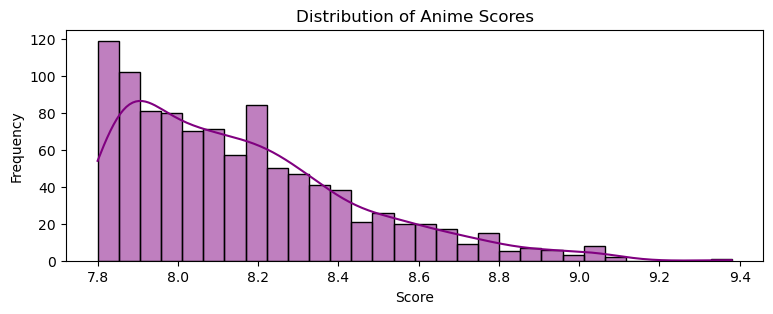

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Anime Scores
plt.figure(figsize=(9, 3))
sns.histplot(df['Score'], kde=True, color='purple', bins=30)
plt.title("Distribution of Anime Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

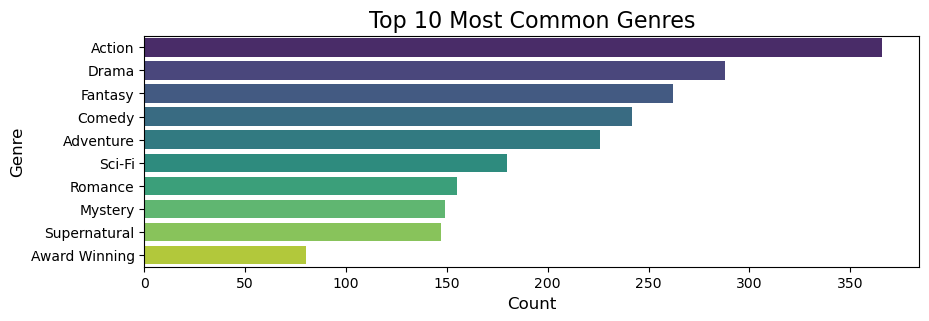

In [298]:
# Clean the Genres column again (if needed)
df['Genres'] = df['Genres'].fillna('')  # Ensure no NaN values
df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if x else [])  # Split genres into lists

# Exploding the list of genres into individual rows
exploded_genres = df['Genres'].explode()

# Count the occurrences of each genre
genre_counts = exploded_genres.value_counts().head(10)

# Plot the top 10 genres
plt.figure(figsize=(10, 3))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, dodge=False, palette='viridis')
plt.title('Top 10 Most Common Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


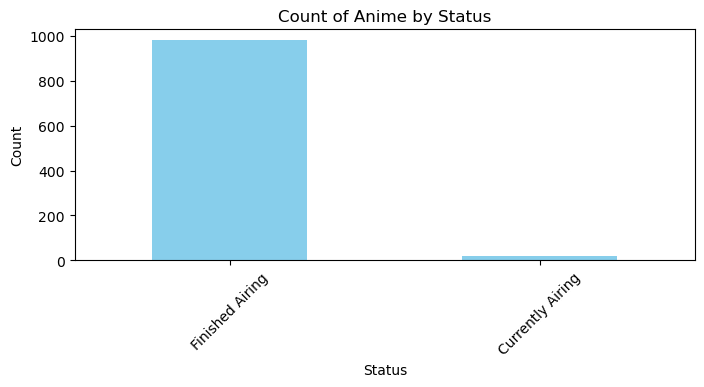

In [299]:
# Count of Anime by Status
status_counts = df['Status'].value_counts()

# Plot the distribution of Status
plt.figure(figsize=(8, 3))
status_counts.plot(kind='bar', color='skyblue')
plt.title("Count of Anime by Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [300]:
#print(genre_counts.head())
print(df['Genres'].head())  # View the first few rows of the 'Genres' column


0    [Action, Award Winning, Drama, Suspense]
1                    [Supernatural, Suspense]
2         [Action, Adventure, Drama, Fantasy]
3                            [Action, Comedy]
4            [Action, Award Winning, Fantasy]
Name: Genres, dtype: object


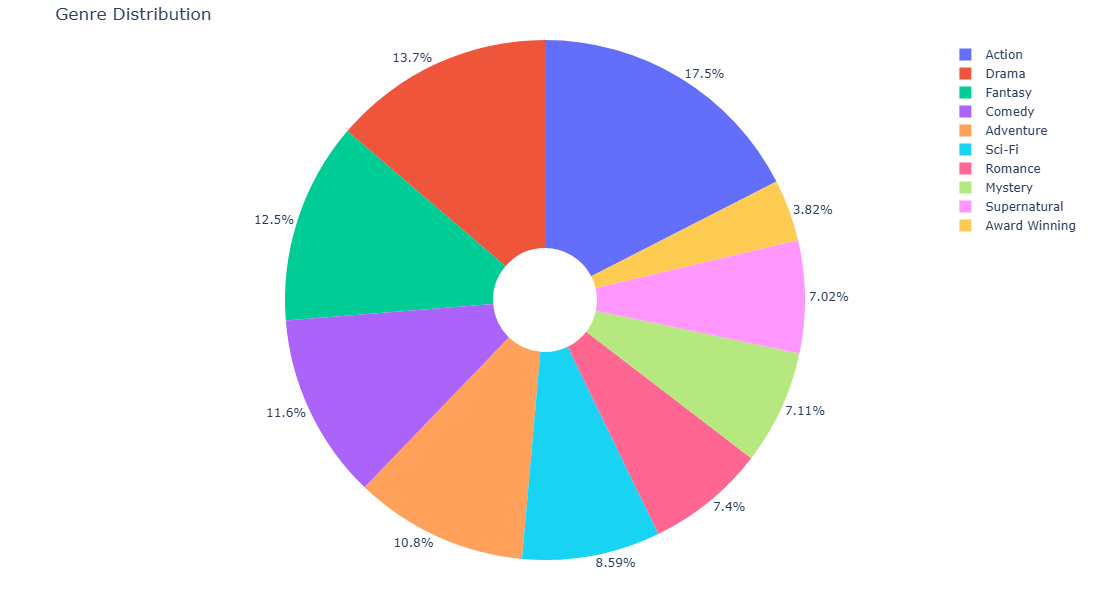

In [301]:
# Split the genres into separate rows (explode)
genre_counts = df['Genres'].dropna().explode().value_counts().reset_index()

# Rename the columns for clarity
genre_counts.columns = ['Genre', 'Count']

# limit to top 10 genres to reduce congestion
genre_counts = genre_counts.head(10)

# Create the pie chart for genre distribution without pull effect
fig = px.pie(genre_counts, names='Genre', values='Count', title='Genre Distribution', 
             hole=0.2,  # Creates a donut chart effect (optional)
             color='Genre',  # Colors based on 'Genre'
             labels={'Genre': 'Anime Genre', 'Count': 'Number of Anime'})

# Update the traces to show percentages outside the pie chart
fig.update_traces(textinfo='percent', textposition='outside')


fig.update_layout(
    width=600,  # Adjust the width of the figure
    height=600,  # Adjust the height of the figure
    margin=dict(t=40, b=40, l=40, r=40)  # Add margins for spacing
)

# Display the plot
fig.show()


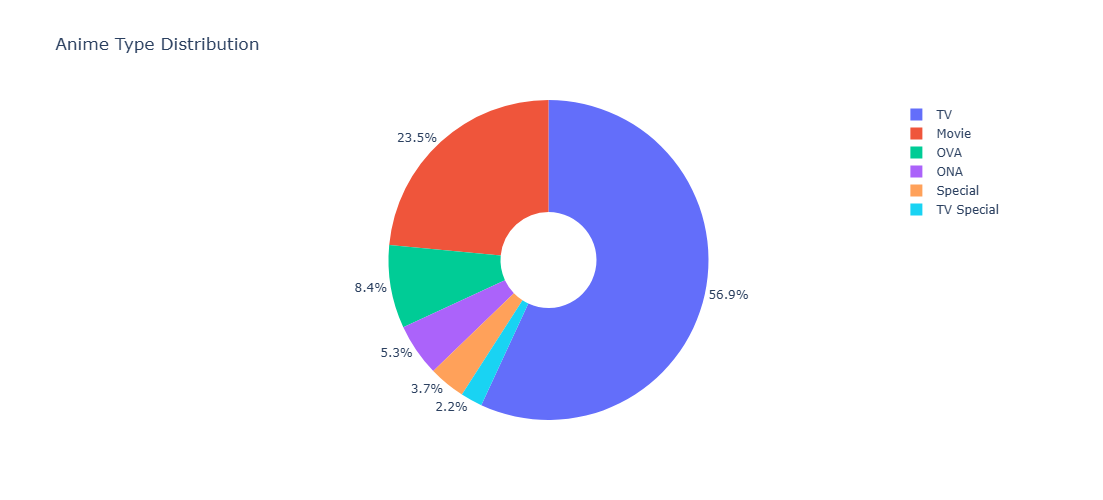

In [302]:
import plotly.express as px

# Prepare the data for Pie chart
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Create the basic pie chart
fig = px.pie(type_counts, names='Type', values='Count', title='Anime Type Distribution', 
             hole=0.3,  # Creates a donut chart effect (optional)
             color='Type',  # Colors based on 'Type'
             labels={'Type': 'Anime Type', 'Count': 'Number of Anime'})

# Update the traces to show percentages outside the pie chart
fig.update_traces(textinfo='percent', textposition='outside')

# Increase the figure size
fig.update_layout(
    width=500,  # Adjust the width of the figure
    height=500,  # Adjust the height of the figure
)

# Show the pie chart
fig.show()


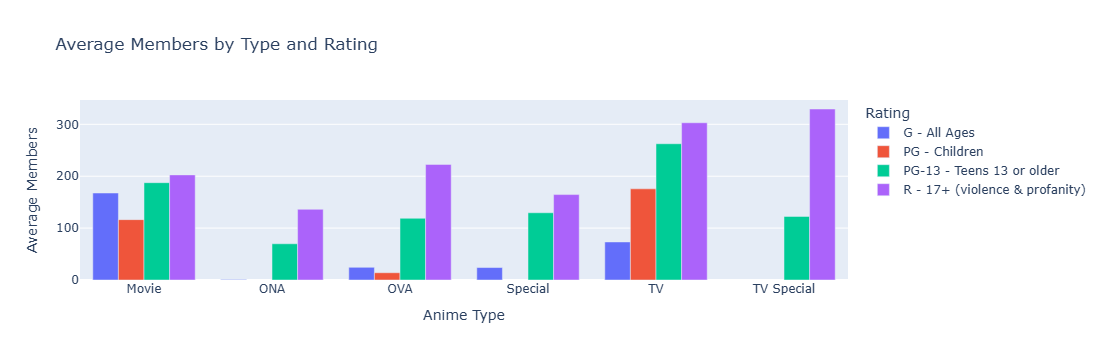

In [303]:


# Filter out few rows
df_filtered = df[~df['Rating'].isin(['R+ - Mild Nudity', '18+'])]

# Grouping by 'Type' and 'Rating' to get the average number of members for each combination
avg_members_by_type_rating = df_filtered.groupby(['Type', 'Rating'])['Members'].mean().reset_index()

# Create a grouped bar chart using Plotly
fig = px.bar(
    avg_members_by_type_rating,
    x='Type',
    y='Members',
    color='Rating',
    barmode='group',
    labels={'Members': 'Average Members', 'Type': 'Anime Type'},
    title='Average Members by Type and Rating',
    hover_data=['Rating', 'Members']  # Adding hover information
)

# Show the plot
fig.show()


In [304]:
# Group by 'Type' and sum the 'Members' to get the total number of people who watched each type of anime
type_members = anime_data.groupby('Type')['Members'].sum().reset_index()

# Sort by the number of members to see which type has the highest number of viewers
type_members = type_members.sort_values('Members', ascending=False)

print(type_members)

         Type  Members
4          TV   151484
0       Movie    46204
2         OVA    11730
1         ONA     5117
3     Special     4653
5  TV Special     4460


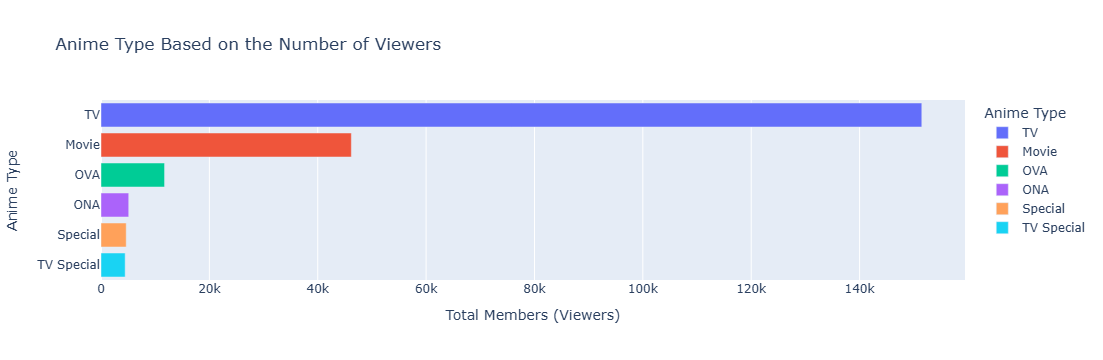

In [305]:
import plotly.express as px

# Prepare the data
type_members = anime_data.groupby('Type')['Members'].sum().reset_index()
type_members = type_members.sort_values('Members', ascending=False)

# Create the interactive bar plot
fig = px.bar(type_members, x='Members', y='Type', 
             title='Anime Type Based on the Number of Viewers', 
             labels={'Members': 'Total Members (Viewers)', 'Type': 'Anime Type'},
             color='Type',  # Colors based on anime type
             text='Members',  # Display the member count on top of the bars
             orientation='h')  # Horizontal bar plot
fig.update_traces(textposition='none')

fig.show()


In [306]:
# Check the first few rows of the 'Studios' column to see its structure
print(anime_data['Studios'].head())

0    [Wit Studio]
1      [Madhouse]
2         [Bones]
3      [Madhouse]
4      [ufotable]
Name: Studios, dtype: object


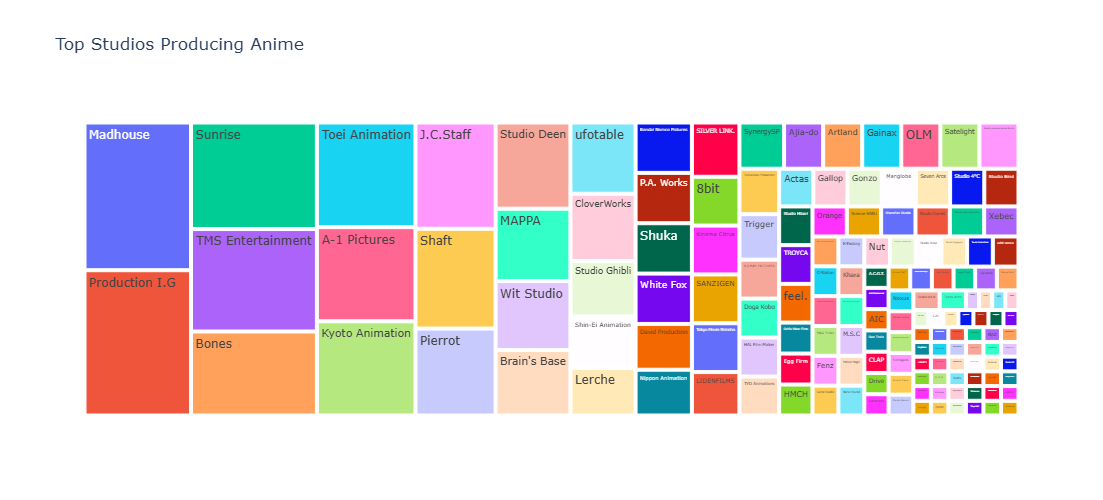

In [307]:
# Exploding the 'Studios' column to separate each studio in a new row
studio_exploded = anime_data.explode('Studios')

# Group by the 'Studios' column and count the occurrences
studio_counts = studio_exploded.groupby('Studios').size().reset_index(name='Count')

# Drop any rows with NaN values in 'Count' (if any)
studio_counts = studio_counts.dropna(subset=['Count'])

# create the treemap 
fig = px.treemap(
    studio_counts,  # Data with Count values
    path=['Studios'],  # Hierarchical path for the treemap
    values='Count',  
    title='Top Studios Producing Anime',
    width=1100,        # Adjust the width of the figure
    height=500         # Adjust the height of the figure
)
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Count: %{value}<extra></extra>' 
)
fig.show()


In [308]:
print(df.columns)

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'Title', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered',
       'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Demographic', 'Duration', 'Rating', 'Combined_Score'],
      dtype='object')


In [356]:
# Function to recommend top N anime based on a given genre and other criteria
def recommend_by_genre_and_criteria(genre_input, criteria=['Popularity'], top_n=10):
    # Filter anime data by genre matching
    genre_input = genre_input.lower()
    
    # Check if the genre_input is part of any genre in the Genres column
    genre_filtered_data = df[df['Genres'].str.split(',').apply(lambda x: any(genre_input in g.lower() for g in x))]
    
    if genre_filtered_data.empty:
        print(f"No anime found for the genre: {genre_input}")
        return None
    
    # Validate criteria
    valid_criteria = ['Popularity', 'Score', 'Rank', 'Members']
    for criterion in criteria:
        if criterion not in valid_criteria:
            print(f"Invalid criterion: {criterion}. Valid options are: {valid_criteria}")
            return None
    
    # Sort the filtered data based on the specified criteria
    ascending_flags = [False if criterion != 'Rank' else True for criterion in criteria]
    sorted_anime = genre_filtered_data.sort_values(by=criteria, ascending=ascending_flags)
    
    # Check if 'Title' exists before attempting to access it
    if 'Title' not in sorted_anime.columns:
        print("The 'Title' column is missing in the filtered data.")
        return None
    
    # Return the top N recommendations based on sorted criteria
    recommended_animes = sorted_anime[['Title', 'Genres'] + criteria].head(top_n)
    return recommended_animes

# Main loop to continuously accept user input
while True:
    genre_input = input("Enter the genre to base recommendations on (e.g., Action, Adventure, Fantasy), or 'exit' to stop: ").strip()
    
    if genre_input.lower() == 'exit':
        print("Exiting the program.")
        break
    
    # Normalize criteria input to match valid options (case-insensitive)
    valid_criteria = ['Popularity', 'Score', 'Rank', 'Members']
    criteria_input = input("Enter the criteria for recommendations (e.g., Popularity, Score, Rank, Members), separated by commas: ").strip()
    criteria = [x.strip().capitalize() for x in criteria_input.split(',')]

    # Validate criteria against valid options
    invalid_criteria = [criterion for criterion in criteria if criterion not in valid_criteria]
    if invalid_criteria:
        print(f"Invalid criteria: {', '.join(invalid_criteria)}. Valid options are: {valid_criteria}")
        continue
    
    top_n_input = input("Enter the number of top recommendations to get (default is 10): ").strip()
    top_n = int(top_n_input) if top_n_input.isdigit() else 10

    recommended_animes = recommend_by_genre_and_criteria(genre_input=genre_input, criteria=criteria, top_n=top_n)
    
    if recommended_animes is not None and not recommended_animes.empty:
        print(f"\nRecommended Anime based on Genre: {genre_input} and {', '.join(criteria)}:")
        for _, row in recommended_animes.iterrows():
            print(f"{row['Title']} | {row['Genres']} | {', '.join([str(row[criterion]) for criterion in criteria])}")
    else:
        print(f"No recommendations found for the given genre and criteria.")

    continue_choice = input("\nDo you want to provide another input? (yes/no): ").strip().lower()
    if continue_choice == 'no':
        print("Exiting the program.")
        break
    elif continue_choice != 'yes':
        print("Invalid input. Exiting the program.")
        break


Enter the genre to base recommendations on (e.g., Action, Adventure, Fantasy), or 'exit' to stop:  action
Enter the criteria for recommendations (e.g., Popularity, Score, Rank, Members), separated by commas:  score
Enter the number of top recommendations to get (default is 10):  5



Recommended Anime based on Genre: action and Score:
Fullmetal Alchemist: Brotherhood | ['Action', 'Adventure', 'Drama', 'Fantasy'] | 9.09
Gintama Season 4 | ['Action', 'Comedy', 'Sci-Fi'] | 9.06
Attack on Titan Season 3 Part 2 | ['Action', 'Drama', 'Suspense'] | 9.05
Gintama: The Very Final | ['Action', 'Comedy', 'Drama', 'Sci-Fi'] | 9.04
Hunter x Hunter | ['Action', 'Adventure', 'Fantasy'] | 9.04



Do you want to provide another input? (yes/no):  yes
Enter the genre to base recommendations on (e.g., Action, Adventure, Fantasy), or 'exit' to stop:  drama
Enter the criteria for recommendations (e.g., Popularity, Score, Rank, Members), separated by commas:  rank
Enter the number of top recommendations to get (default is 10):  6



Recommended Anime based on Genre: drama and Rank:
Frieren: Beyond Journey's End | ['Adventure', 'Drama', 'Fantasy'] | 1
Fullmetal Alchemist: Brotherhood | ['Action', 'Adventure', 'Drama', 'Fantasy'] | 2
Steins;Gate | ['Drama', 'Sci-Fi', 'Suspense'] | 3
Attack on Titan Season 3 Part 2 | ['Action', 'Drama', 'Suspense'] | 5
Gintama: The Very Final | ['Action', 'Comedy', 'Drama', 'Sci-Fi'] | 6
Legend of the Galactic Heroes | ['Drama', 'Sci-Fi'] | 10



Do you want to provide another input? (yes/no):  yes
Enter the genre to base recommendations on (e.g., Action, Adventure, Fantasy), or 'exit' to stop:  Fantasy
Enter the criteria for recommendations (e.g., Popularity, Score, Rank, Members), separated by commas:  score
Enter the number of top recommendations to get (default is 10):  8



Recommended Anime based on Genre: Fantasy and Score:
Frieren: Beyond Journey's End | ['Adventure', 'Drama', 'Fantasy'] | 9.38
Fullmetal Alchemist: Brotherhood | ['Action', 'Adventure', 'Drama', 'Fantasy'] | 9.09
Hunter x Hunter | ['Action', 'Adventure', 'Fantasy'] | 9.04
Bleach: Thousand-Year Blood War | ['Action', 'Adventure', 'Fantasy'] | 9.02
Violet Evergarden: The Movie | ['Award Winning', 'Drama', 'Fantasy'] | 8.87
Jujutsu Kaisen Season 2 | ['Action', 'Fantasy'] | 8.84
Demon Slayer: Kimetsu no Yaiba Entertainment District Arc | ['Action', 'Fantasy'] | 8.75
One Piece | ['Action', 'Adventure', 'Fantasy'] | 8.72



Do you want to provide another input? (yes/no):  yes
Enter the genre to base recommendations on (e.g., Action, Adventure, Fantasy), or 'exit' to stop:  Adventure
Enter the criteria for recommendations (e.g., Popularity, Score, Rank, Members), separated by commas:  Popularity
Enter the number of top recommendations to get (default is 10):  3



Recommended Anime based on Genre: Adventure and Popularity:
Swallowed Star 3rd Season | ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] | 11443
The Demon Hunter | ['Action', 'Adventure', 'Fantasy'] | 11337
Swallowed Star 4th Season | ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] | 11250



Do you want to provide another input? (yes/no):  no


Exiting the program.
